Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading Training Dataset

In [2]:
dataset_train = pd.read_csv("AMZN.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-13,163.485504,164.419006,163.054504,164.214005,164.214005,48402000
1,2021-10-14,165.122498,165.630005,164.539001,164.992996,164.992996,42190000
2,2021-10-15,165.570999,170.520996,165.199997,170.451004,170.451004,103598000
3,2021-10-18,169.417999,172.458496,169.255005,172.337006,172.337006,63482000
4,2021-10-19,171.714493,172.734497,171.100006,172.207504,172.207504,47722000


Use the Open Stock Price Column to Train Model

In [3]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[163.485504]
 [165.122498]
 [165.570999]
 [169.417999]
 [171.714493]
 [172.632996]
 [170.712494]
 [171.050003]
 [166.75    ]
 [167.475494]
 [169.399994]
 [170.104996]
 [165.001007]
 [168.089996]
 [165.750504]
 [165.449997]
 [168.5     ]
 [173.850006]
 [176.162003]
 [175.762497]
 [178.193497]
 [175.649994]
 [174.25    ]
 [176.850006]
 [176.949997]
 [178.235992]
 [178.317505]
 [185.634506]
 [183.819   ]
 [179.251999]
 [178.133499]
 [180.104996]
 [177.382004]
 [178.175003]
 [177.25    ]
 [173.      ]
 [172.75    ]
 [169.649994]
 [174.600006]
 [176.150497]
 [175.75    ]
 [175.417007]
 [172.      ]
 [167.550003]
 [168.598007]
 [173.3685  ]
 [167.710495]
 [166.850006]
 [167.850494]
 [169.270004]
 [170.427994]
 [171.037003]
 [170.182495]
 [170.839996]
 [169.699997]
 [168.955994]
 [167.550003]
 [170.438004]
 [166.882996]
 [163.4505  ]
 [163.839005]
 [160.585495]
 [161.5     ]
 [166.574997]
 [165.250504]
 [160.149994]
 [159.104996]
 [158.761993]
 [156.766006]
 [149.949997]
 [139.      ]
 [142.

Normalizing Dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[7.32772709e-01],
       [7.52523011e-01],
       [7.57934167e-01],
       [8.04348149e-01],
       [8.32055306e-01],
       [8.43137027e-01],
       [8.19966207e-01],
       [8.24038247e-01],
       [7.72158792e-01],
       [7.80911863e-01],
       [8.04130919e-01],
       [8.12636755e-01],
       [7.51057224e-01],
       [7.88325818e-01],
       [7.60099891e-01],
       [7.56474280e-01],
       [7.93272509e-01],
       [8.57820230e-01],
       [8.85714430e-01],
       [8.80894398e-01],
       [9.10224367e-01],
       [8.79537051e-01],
       [8.62646150e-01],
       [8.94015173e-01],
       [8.95221563e-01],
       [9.10737068e-01],
       [9.11720521e-01],
       [1.00000000e+00],
       [9.78095954e-01],
       [9.22995174e-01],
       [9.09500492e-01],
       [9.33286566e-01],
       [9.00433719e-01],
       [9.10001237e-01],
       [8.98841093e-01],
       [8.47564924e-01],
       [8.44548678e-01],
       [8.07147165e-01],
       [8.66868966e-01],
       [8.85575610e-01],


Creating X_train and y_train Data Structures for training

In [5]:
x_train = []
y_train = []
for i in range(10,253):
  x_train.append(scaled_training_set[i-10:i,0])
  y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(243, 10)
(243,)


Reshape the data

In [6]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(243, 10, 1)

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

Model fitting

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 9s 62ms/step - loss: 0.1760
Epoch 2/100
8/8 [==============================] - 1s 62ms/step - loss: 0.0510
Epoch 3/100
8/8 [==============================] - 1s 67ms/step - loss: 0.0398
Epoch 4/100
8/8 [==============================] - 1s 78ms/step - loss: 0.0295
Epoch 5/100
8/8 [==============================] - 0s 55ms/step - loss: 0.0245
Epoch 6/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0181
Epoch 7/100
8/8 [==============================] - 0s 56ms/step - loss: 0.0175
Epoch 8/100
8/8 [==============================] - 1s 70ms/step - loss: 0.0164
Epoch 9/100
8/8 [==============================] - 0s 50ms/step - loss: 0.0185
Epoch 10/100
8/8 [==============================] - 0s 47ms/step - loss: 0.0141
Epoch 11/100
8/8 [==============================] - 0s 64ms/step - loss: 0.0160
Epoch 12/100
8/8 [==============================] - 1s 64ms/step - loss: 0.0170
Epoch 13/100
8/8 [==============================]

Extracting the Actual Stock Prices

In [10]:
dataset_test = pd.read_csv("AMZN.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

Preparing the Input for the Model

In [11]:
dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-10:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test=[]
for i in range(10,260):
  x_test.append(inputs[i-10:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


Predicting the Stock Prices

In [12]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 9ms/step


Plotting graph

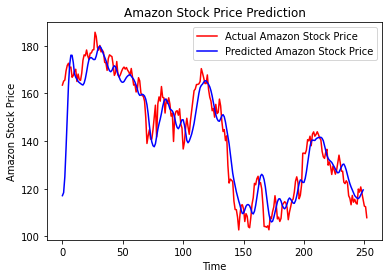

In [15]:
plt.plot(actual_stock_price, color='red', label='Actual Amazon Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()